In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


In [10]:
# Load the processed data
data_path = '../data/cleaned_data.csv' # Update with your actual path

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f"✅ Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    display(df.head())
else:
    print("❌ Error: 'cleaned_data.csv' not found. Please run data_processing.py first.")

✅ Data Loaded: 1000 rows, 14 columns


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Day_of_Week,Gender_Encoded,Category_Encoded
0,1,2023-11-24,CUST001,Male,34,Beauty,3,20,60,11,2023,4,1,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,112,224,2,2023,0,0,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,929,929,1,2023,4,1,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,293,293,5,2023,6,1,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,40,80,5,2023,5,1,0


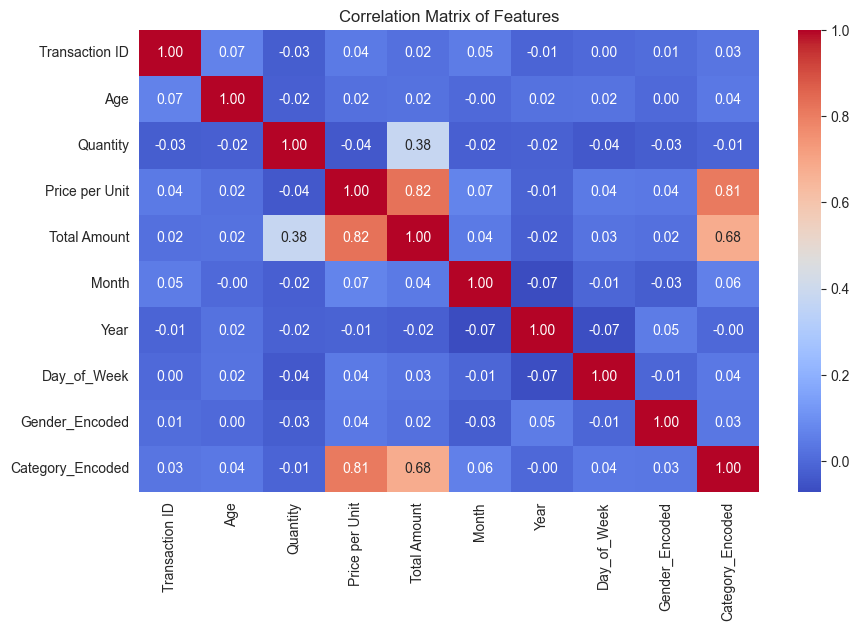

In [11]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Sadece sayısal sütunları seçelim
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [12]:
# 1. Define Features (X) and Target (y)
# Features: Age, Gender_Encoded, Category_Encoded, Quantity
X = df[['Age', 'Gender_Encoded', 'Category_Encoded', 'Quantity']]

# Target: Total Amount
y = df['Total Amount']

# 2. Split into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training Set Size: 800
Testing Set Size: 200


In [13]:
# Initialize the Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("✅ Model Trained Successfully!")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

✅ Model Trained Successfully!
Intercept: -715.1283332085254
Coefficients: [  1.65193354  36.02410419 652.86964829 254.17801134]


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}") 

📊 Model Performance Metrics:
Mean Squared Error (MSE): 257112.03
R2 Score (Accuracy): 0.61


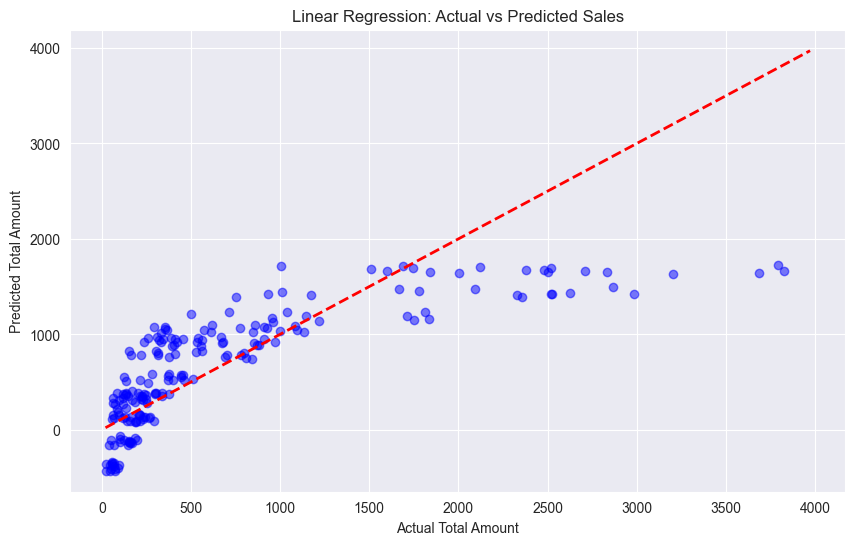

In [15]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Total Amount")
plt.ylabel("Predicted Total Amount")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.grid(True)
plt.show()

In [17]:
# Create models directory if not exists
save_dir = '../models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model using pickle
model_path = os.path.join(save_dir, 'regression_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"💾 Model saved successfully to: {model_path}")

💾 Model saved successfully to: ../models\regression_model.pkl
